# check gene expression for MTGR1 related markers

In [1]:
import scanpy as sc 
import numpy as np
import pandas as pd
import os
import sys
from matplotlib import pyplot as plt
import anndata as ad


In [2]:
import seaborn as sn

In [3]:
sys.path.append("/home/lucy/star_proto_filter/")
sys.path.append("/home/lucy/")
sys.path.append("/home/lucy/AmbientContaminationMetrics/")
#sys.path.append("/home/lucy/quality/plot_quality_score.py")


In [4]:
import zc_filter_function as zc_filter
import quality_control_function as zc_qc
import plot_quality_score as qc_plt
import zc_function as zc

## load combined data

In [5]:
dat =  sc.read("./new_sample_10868_filtered/subsampled_epi_12356.h5ad")

In [4]:
dat

AnnData object with n_obs × n_vars = 12792 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition', 'cell_type_old'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'cell_type_old_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'full_norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


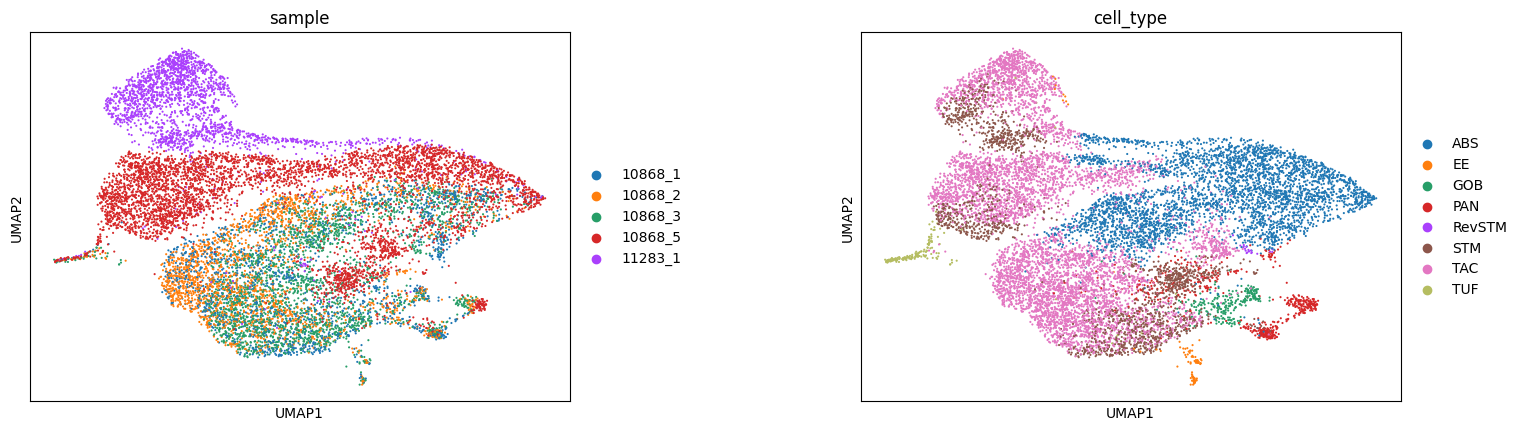

In [6]:
sc.pl.umap( dat, color = ['sample','cell_type'] , wspace = 0.4)

In [6]:
dat.raw = dat.copy()

In [7]:
ret = zc.normalization( dat)

In [12]:
'Fgfbp1' in dat.var_names

True

In [13]:
dat.var_names[dat.var_names.str.startswith('Cb')]
# Cbfa2t2 is MTGR1

Index(['Cbfa2t2', 'Cbx3', 'Cblc', 'Cbr4', 'Cbfb', 'Cbfa2t3', 'Cbl', 'Cbarp',
       'Cby3', 'Cbx1', 'Cbx2', 'Cbx8', 'Cbx4', 'Cbr2', 'Cbll1', 'Cby1', 'Cbx6',
       'Cbx7', 'Cbx5', 'Cblb', 'Cbr1', 'Cbr3', 'Cbs', 'Cblif', 'Cbwd1'],
      dtype='object', name='Genes')

In [14]:
dat.obs.columns

Index(['sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial',
       'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial',
       'leiden', 'cell_type', 'treatment', 'condition', 'cell_type_old'],
      dtype='object')

In [16]:
dat.obs['condition'].unique()

['WT', 'Mtgr1 -/-']
Categories (2, object): ['Mtgr1 -/-', 'WT']

In [8]:
mut = dat[dat.obs['condition'] == 'Mtgr1 -/-' ]
wt = dat[dat.obs['condition'] == 'WT' ]

correct the color with the cell type overlay

In [43]:
dat

AnnData object with n_obs × n_vars = 12792 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition', 'cell_type_old'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'cell_type_old_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap', 'condition_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'full_norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [45]:
dat.obs['cell_type'].unique()

['TAC', 'ABS', 'PAN', 'STM', 'GOB', 'EE', 'TUF', 'RevSTM']
Categories (8, object): ['ABS', 'EE', 'GOB', 'PAN', 'RevSTM', 'STM', 'TAC', 'TUF']

In [44]:
dat.uns['cell_type_colors']

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61'], dtype=object)

In [46]:
cell_color_dict = dict( zip( ['ABS', 'EE', 'GOB', 'PAN', 'RevSTM', 'STM', 'TAC', 'TUF'], dat.uns['cell_type_colors'] ))

In [47]:
mut.obs['cell_type'].unique()

['TAC', 'STM', 'ABS', 'TUF', 'EE', 'PAN']
Categories (6, object): ['ABS', 'EE', 'PAN', 'STM', 'TAC', 'TUF']

In [48]:
mut_ct_palette = [ cell_color_dict[k] for k in ['ABS', 'EE', 'PAN', 'STM', 'TAC', 'TUF'] ] 

In [49]:
wt.obs['cell_type'].unique()

['TAC', 'ABS', 'PAN', 'STM', 'GOB', 'EE', 'TUF', 'RevSTM']
Categories (8, object): ['ABS', 'EE', 'GOB', 'PAN', 'RevSTM', 'STM', 'TAC', 'TUF']

In [50]:
wt_ct_palette = [ cell_color_dict[k] for k in ['ABS', 'EE', 'GOB', 'PAN', 'RevSTM', 'STM', 'TAC', 'TUF'] ] 

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


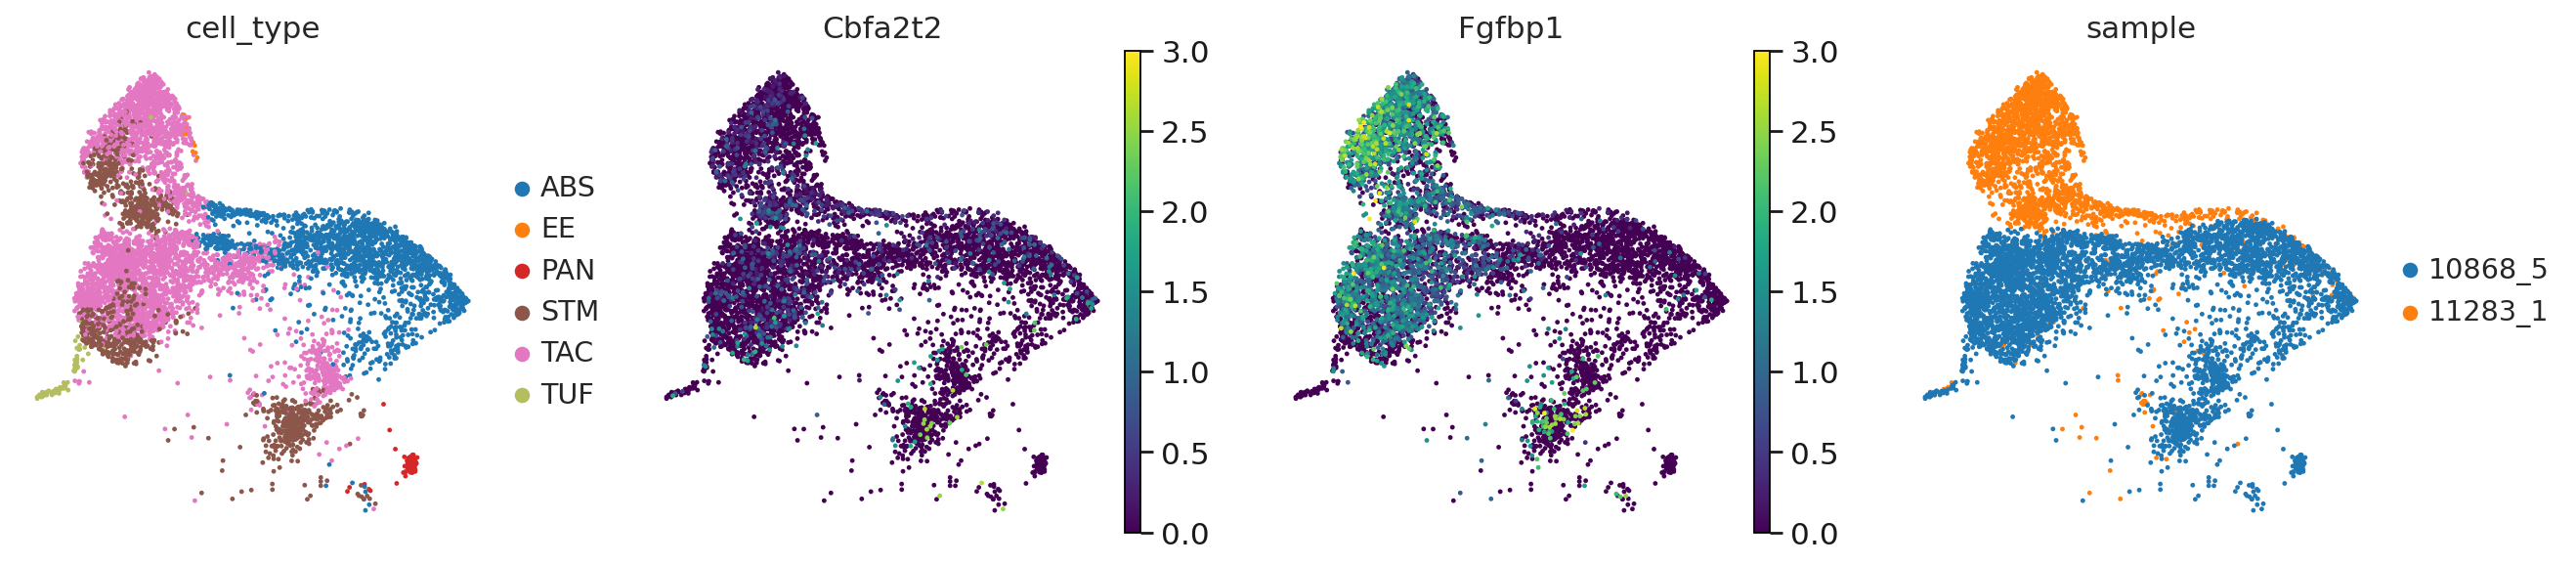

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


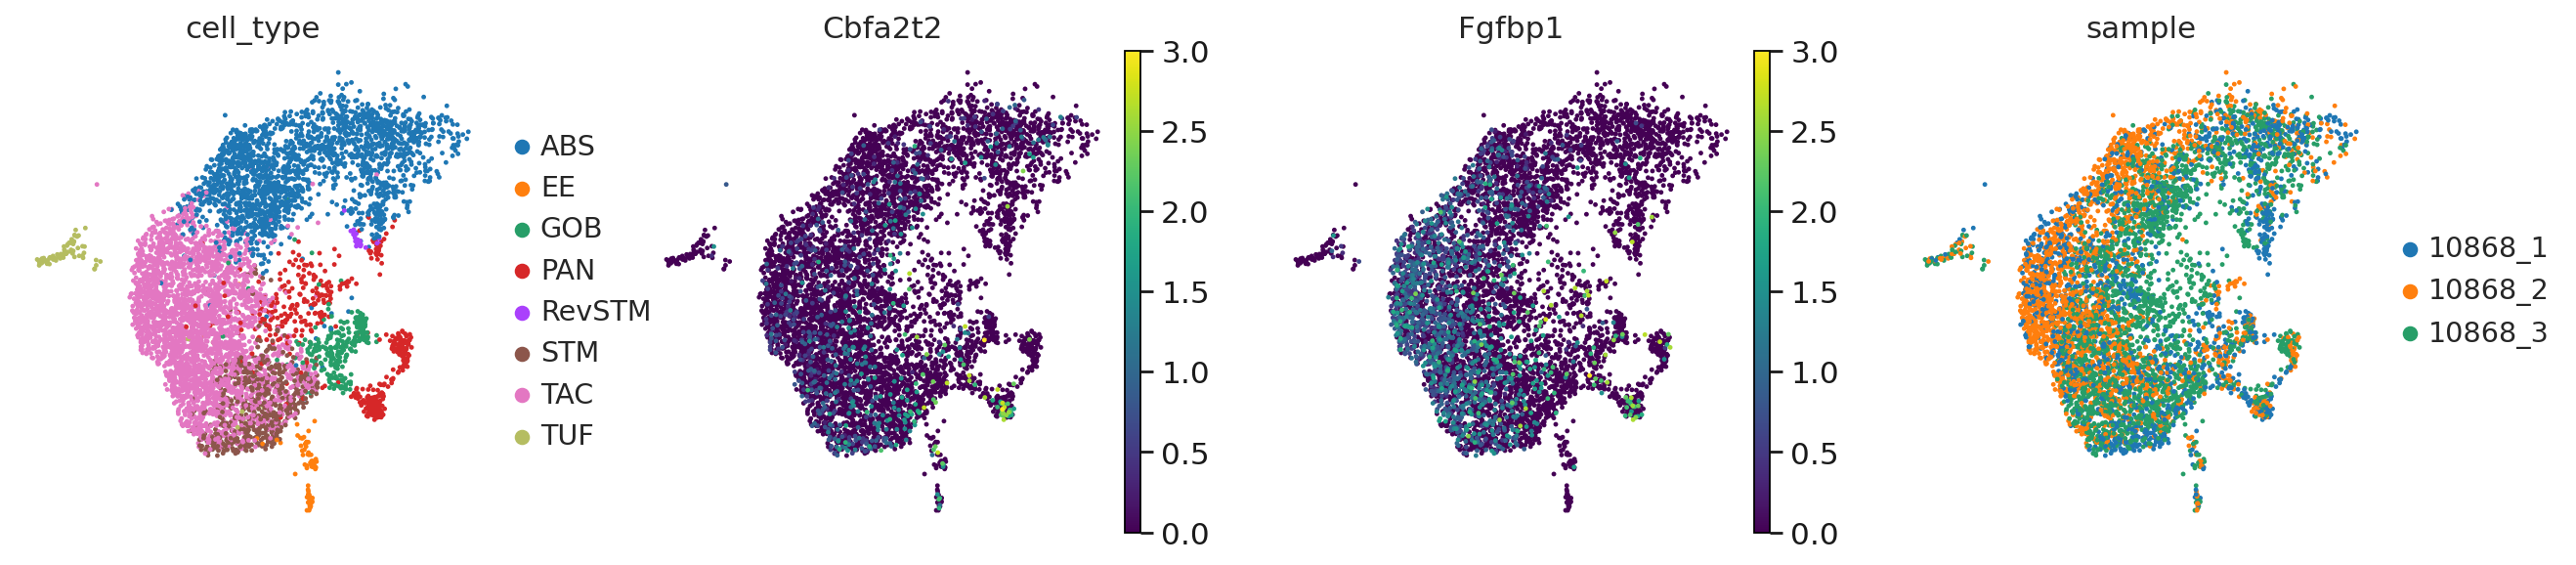

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


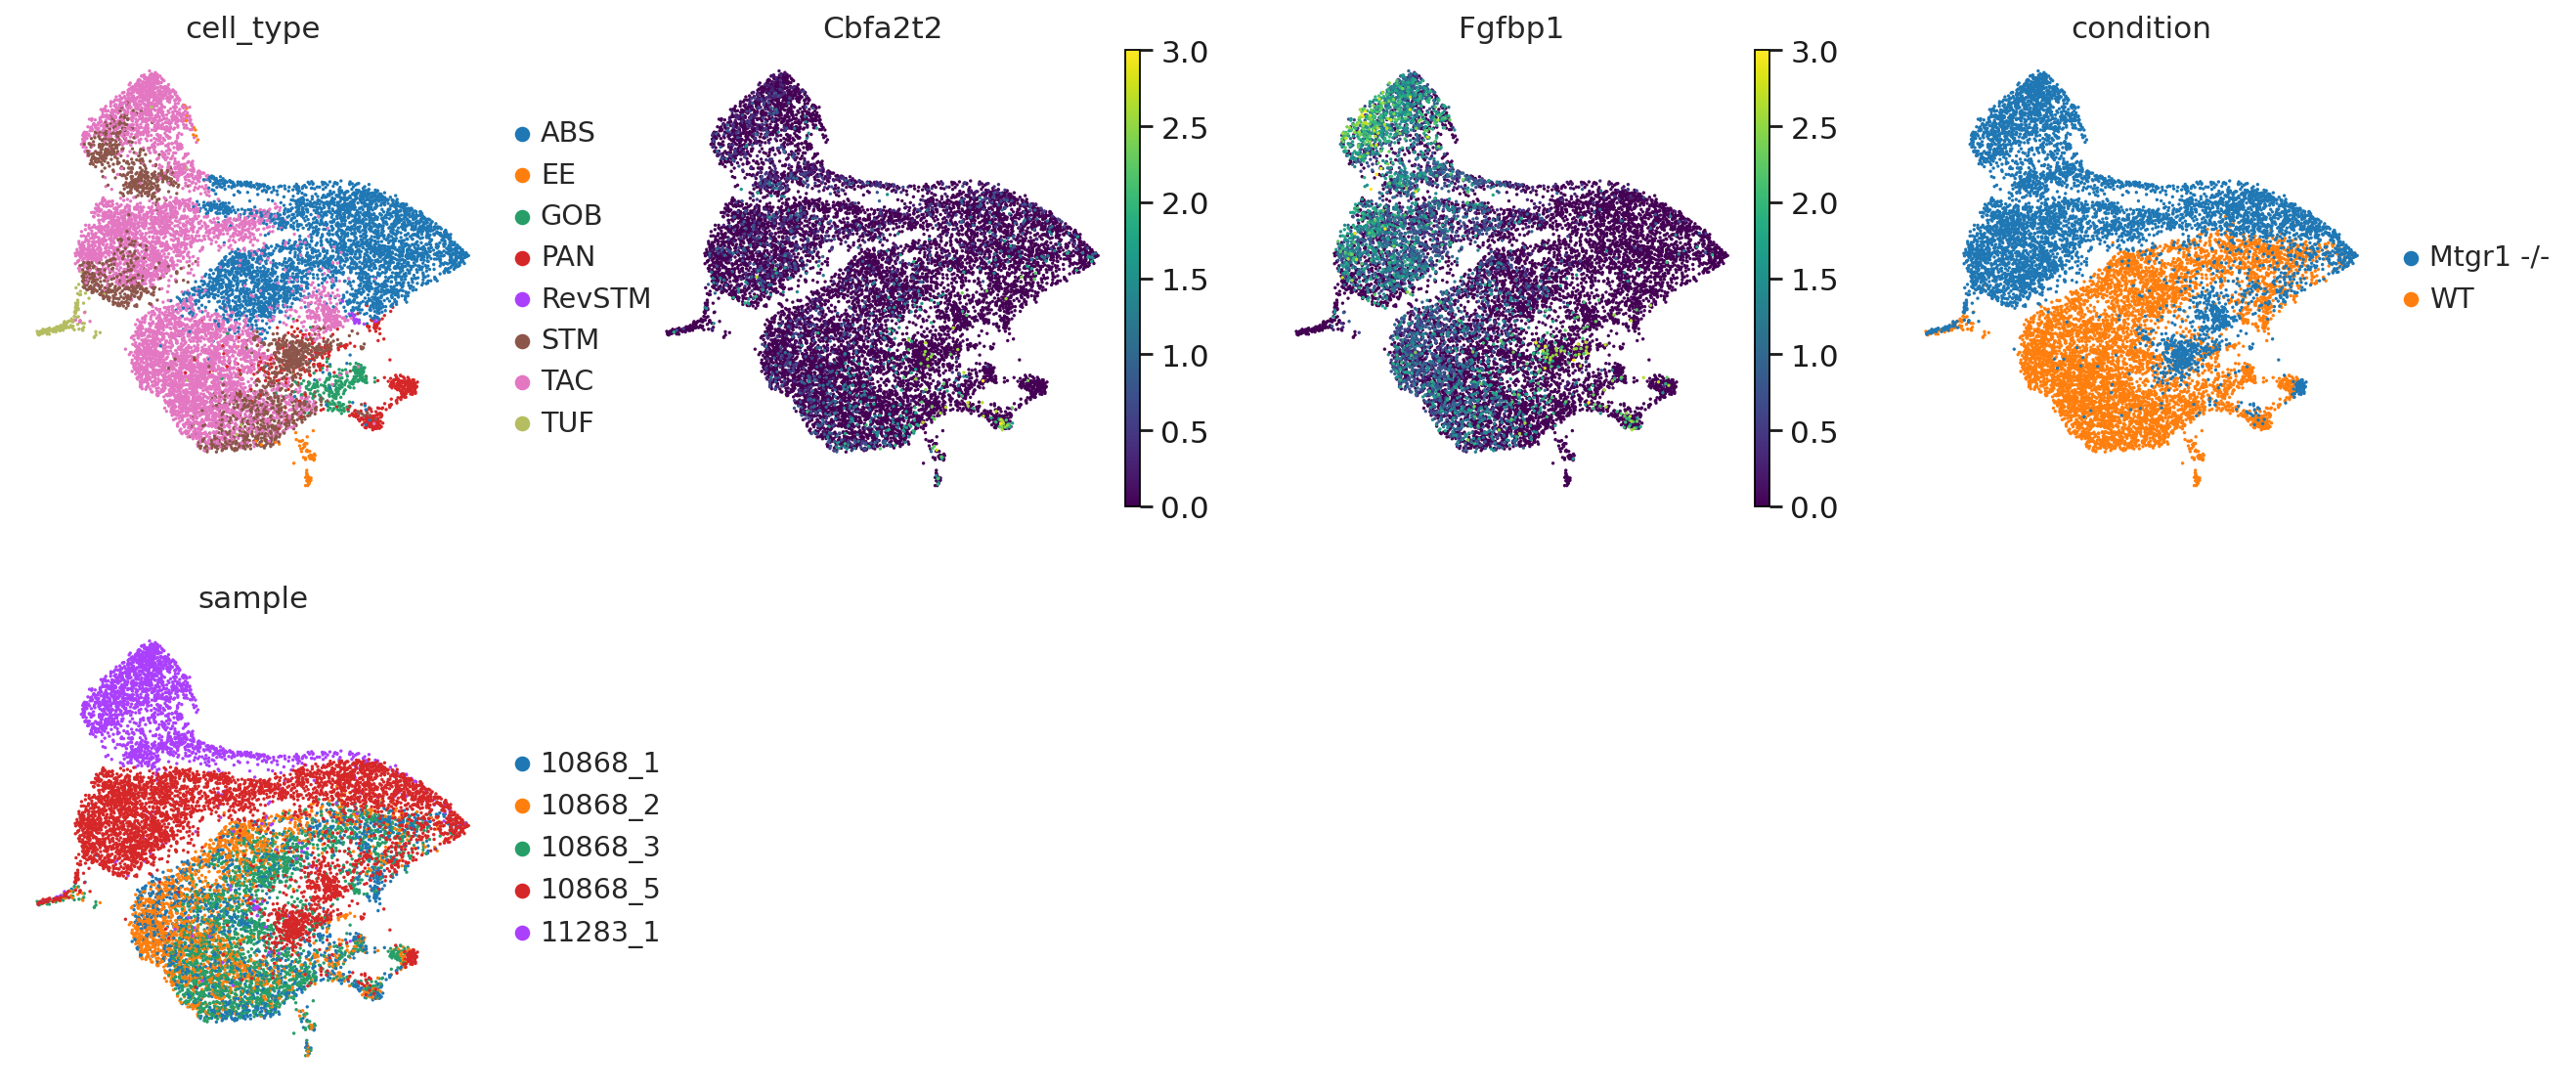

In [52]:
sc.pl.umap( mut, color = ['cell_type', 'Cbfa2t2', 'Fgfbp1', 'sample'], 
           palette = mut_ct_palette,  use_raw = False, layer = 'arcsinh',  
           vmax = [None, 3,3, None], )
sc.pl.umap( wt, color = ['cell_type', 'Cbfa2t2', 'Fgfbp1', 'sample'], 
            palette = wt_ct_palette, use_raw = False, layer = 'arcsinh', 
           vmax = [None, 3,3, None] )
sc.pl.umap( dat, color = ['cell_type', 'Cbfa2t2', 'Fgfbp1', 'condition', 'sample'], use_raw = False, layer = 'arcsinh', vmax = [None, 3,3, None, None] )

In [19]:
#wt.X = np.array( wt.layers['arcsinh'] )
wt.X = wt.layers['arcsinh'].toarray()
mut.X = mut.layers['arcsinh'].toarray()

In [20]:
wt_df = wt.to_df()[['Cbfa2t2', 'Fgfbp1'] ]
mut_df = mut.to_df()[['Cbfa2t2', 'Fgfbp1'] ]

In [21]:
wt_df['cell_type'] = wt.obs['cell_type']
mut_df['cell_type'] = mut.obs['cell_type']

In [24]:
subset_wt_df = wt_df[ wt_df['Cbfa2t2'] > 0 ]
subset_wt_df = subset_wt_df[ subset_wt_df['Fgfbp1'] > 0 ]

Text(0.5, 1.0, 'WT data')

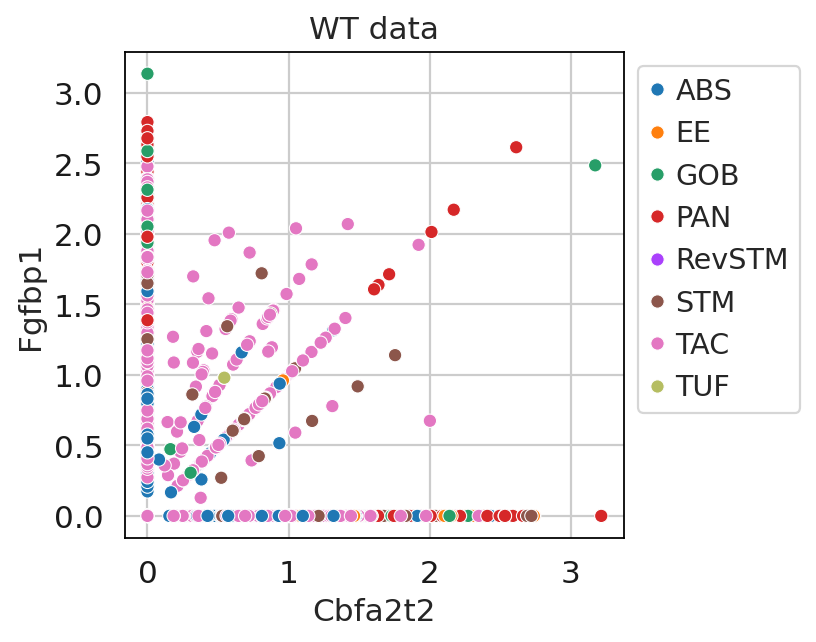

In [61]:
f,a2 = plt.subplots()
sn.scatterplot( data = wt_df, x = 'Cbfa2t2', y = 'Fgfbp1', hue = 'cell_type', ax = a2 )
t = a2.legend(  bbox_to_anchor=[1, 1])
a2.set_title( "WT data")

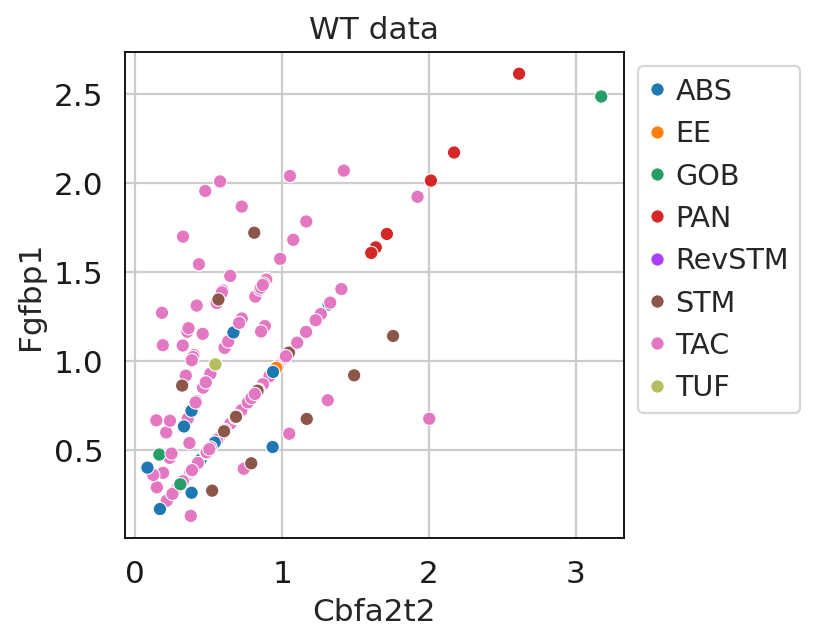

In [53]:
f,a = plt.subplots()
sn.scatterplot( data = subset_wt_df, x = 'Cbfa2t2', y = 'Fgfbp1', hue = 'cell_type', ax = a, palette = wt_ct_palette )
a.legend(  bbox_to_anchor=[1, 1])
t = a.set_title("WT data")

Text(0.5, 1.0, 'Mtgr1 -/- data')

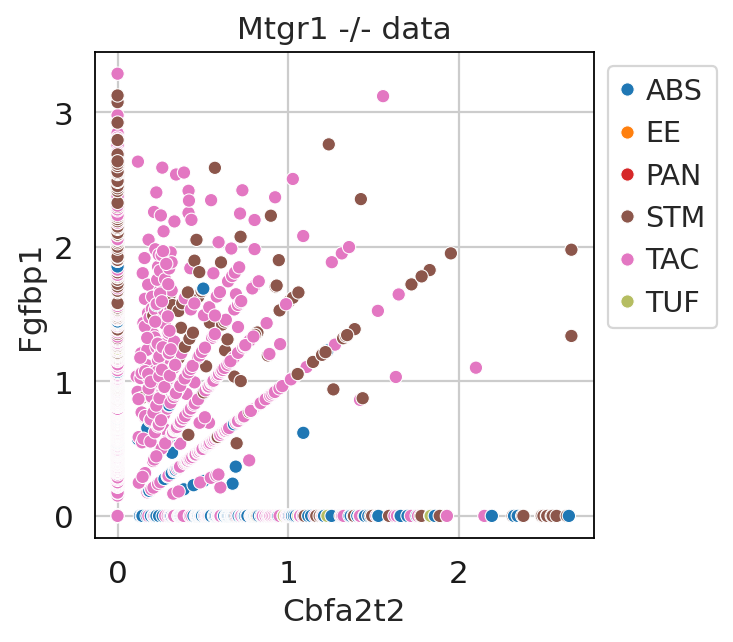

In [62]:
f,a2 = plt.subplots()
sn.scatterplot( data = mut_df, x = 'Cbfa2t2', y = 'Fgfbp1', hue = 'cell_type', ax = a2, palette = mut_ct_palette  )
t = a2.legend(  bbox_to_anchor=[1, 1])
a2.set_title( "Mtgr1 -/- data")

In [26]:
subset_mut_df = mut_df[ mut_df['Cbfa2t2'] > 0 ]
subset_mut_df = subset_mut_df[ subset_mut_df['Fgfbp1'] > 0 ]

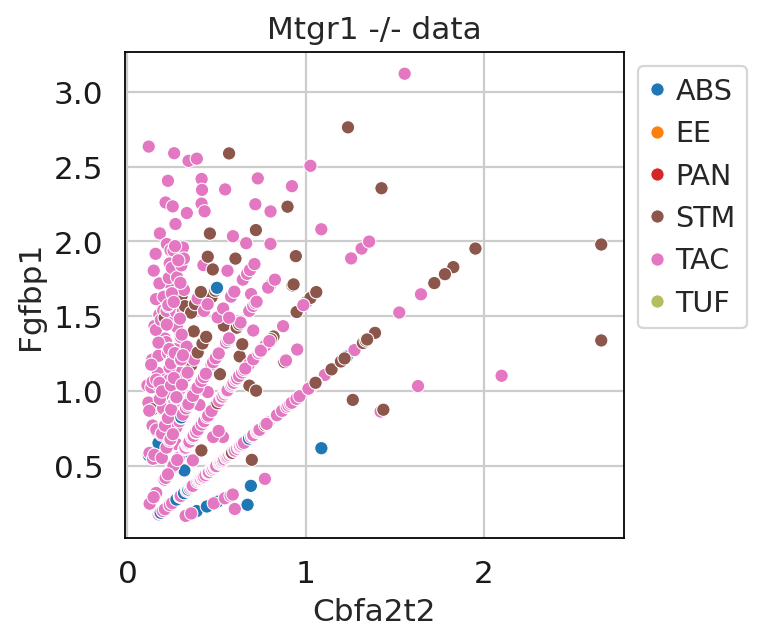

In [55]:
f,a2 = plt.subplots()
sn.scatterplot( data = subset_mut_df, x = 'Cbfa2t2', y = 'Fgfbp1', hue = 'cell_type' , ax = a2, palette = mut_ct_palette)
t = a2.legend(  bbox_to_anchor=[1, 1])
t = a2.set_title("Mtgr1 -/- data")